**Importing necessary libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim


**Loading the data**

In [ ]:
df = pd.read_csv('/content/credit_card_fraud.csv')


In [ ]:
df

,Transaction Date and Time,Transaction Amount,Cardholder Name,Card Number (Hashed or Encrypted),Merchant Name,Merchant Category Code (MCC),Transaction Location (City or ZIP Code),Transaction Currency,Card Type,Card Expiration Date,CVV Code (Hashed or Encrypted),Transaction Response Code,Transaction ID,Fraud Flag or Label,Previous Transactions,Transaction Source,IP Address,Device Information,User Account Information,Transaction Notes
0,2022-09-24 13:54:27,285.88,Shray Soman,daca51bffe0fc4eaaa7c430917f94b75fd893712492254...,"Rajagopalan, Ghose and Kant",3590,Khammam,INR,MasterCard,04/29,01299ac65733b5a3d774265fbfe8396b8611e5e3321855...,5,b7f69cbc-a03d-41f8-adca-75920b0242c3,1,None,Online,18.106.240.6,Tablet,NaN,Consequatur corporis minima ad vero deserunt n...
1,2020-07-24 11:20:13,1777.32,Lakshit Bakshi,d5366dd9be3a0266c0252baceaa6332210ed4dbd0ef252...,Sule PLC,7277,Vasai-Virar,EUR,American Express,03/26,ad8fa913d25b3970c6efa8ca504da8ba670ce2a9cf012d...,12,ad53cc8e-8412-422e-8cad-4176daac8387,1,None,Online,212.48.185.128,Mobile,jloyal,Dolore repellendus odio deleniti. Eaque quibus...
2,2023-03-18 01:05:36,3939.01,Riya Bobal,4737a6384aa1c3c31f7768b86633d6a8401dd6ab4a8ff1...,Badal PLC,9297,Nangloi Jat,USD,Visa,11/29,eb3be230bbd2844b1f5d8f2e4fab9ffba8ab22cfeeb69c...,5,f09cecd6-0d74-4551-8089-a31d64e6b9c5,1,3 or more,In-Person,17.190.112.46,Mobile,NaN,Unde beatae perspiciatis sapiente. Voluptates ...
3,2021-01-07 21:53:04,376.44,Mohanlal Balakrishnan,4721806eed8f2663bb597ff13e79a294de318358fbb54b...,Konda-Sodhi,5686,Ramagundam,USD,Visa,09/25,891d46993a36d78392247c642138cede01d9841daab1d9...,5,b208ae0b-4c4f-428f-b6b9-5360b288b947,0,2,In-Person,153.136.24.104,Tablet,NaN,Cupiditate repellendus necessitatibus quo occa...
4,2021-12-16 06:22:24,1687.33,Mannat Rout,9deacc3a9efd6e382826d400620aca5f23ed94327578e5...,Dua Ltd,2940,Adoni,INR,MasterCard,03/31,48a1a756f2d83f1dc57bbf14052b70a6f40d0fceed6662...,5,6b4e4e43-5b73-4906-9973-299a1b2a5e71,1,2,Online,196.153.28.131,Desktop,NaN,Molestias assumenda consectetur itaque veritat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,2020-12-17 20:36:48,2214.15,Lakshay Khatri,8a0015c8601fe597e160c31a05fd5e4a87a4b876df426f...,Manda Ltd,1236,Anantapuram,EUR,Visa,04/26,d4b9aead1dd10a596542d1d8211a5021b9c3e894751d01...,5,0d219c55-87cf-43af-a1bb-cda408710de1,0,1,Online,214.34.176.247,Mobile,madhavshah,Et maiores quaerat fugiat voluptatibus reprehe...
7996,2022-07-04 05:19:11,675.97,Dharmajan Salvi,de3530e65ccf6fc0c0eb7f7a7e8e5b71bb907d5207d390...,Bhavsar Group,3406,Guntakal,INR,Visa,11/25,d874e4e4a5df21173b0f83e313151f813bea4f488686ef...,0,054f6d58-9925-4c49-9f5d-01b6bf3db5c8,1,3 or more,In-Person,34.237.199.33,Tablet,NaN,Assumenda maxime provident rem quis consequunt...
7997,2022-08-14 19:14:45,918.28,Alia Sane,227356d19fd5374e9cfdd134387fe3499683a1c7929981...,"Gole, Yohannan and Singhal",7504,Udupi,USD,MasterCard,05/24,20e9c64c05a54d199610fb7e38135361324b5ed5dcf39c...,5,4178f63e-459b-40e6-8db6-a6ff2d6348e5,1,3 or more,In-Person,220.203.140.160,Tablet,suhanavala,Voluptatibus odit praesentium iste libero ipsa...
7998,2021-05-16 18:21:52,3035.31,Chirag Rege,669bd9fcc7e40cc25d99c773678e48bcb3fdadf7fee6a9...,Kakar LLC,4015,Sultan Pur Majra,EUR,American Express,09/24,e7866fdc6672f827c76f6124ca3eeaff44aff8b7caf4ee...,0,2424f724-8bd2-4dd0-8b39-e824999a9764,1,1,In-Person,216.56.133.227,Tablet,sumeriyengar,Animi excepturi nam distinctio fuga. Vel eius ...


**Displaying each variable information in the data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Transaction Date and Time                8000 non-null   object 
 1   Transaction Amount                       8000 non-null   float64
 2   Cardholder Name                          8000 non-null   object 
 3   Card Number (Hashed or Encrypted)        8000 non-null   object 
 4   Merchant Name                            8000 non-null   object 
 5   Merchant Category Code (MCC)             8000 non-null   int64  
 6   Transaction Location (City or ZIP Code)  8000 non-null   object 
 7   Transaction Currency                     8000 non-null   object 
 8   Card Type                                8000 non-null   object 
 9   Card Expiration Date                     8000 non-null   object 
 10  CVV Code (Hashed or Encrypted)           8000 no

**Shape of the data**

In [ ]:
df.shape

(8000, 20)

**Finding null values and it's percentages**

In [ ]:
pd.DataFrame({'nulls_count': df.isnull().sum(), 'nulls_%': df.isnull().mean() * 100})

,nulls_count,nulls_%
Transaction Date and Time,0,0.000
Transaction Amount,0,0.000
Cardholder Name,0,0.000
Card Number (Hashed or Encrypted),0,0.000
Merchant Name,0,0.000
Merchant Category Code (MCC),0,0.000
Transaction Location (City or ZIP Code),0,0.000
Transaction Currency,0,0.000
Card Type,0,0.000
Card Expiration Date,0,0.000


**Graph for Transaction Amount Distribution**

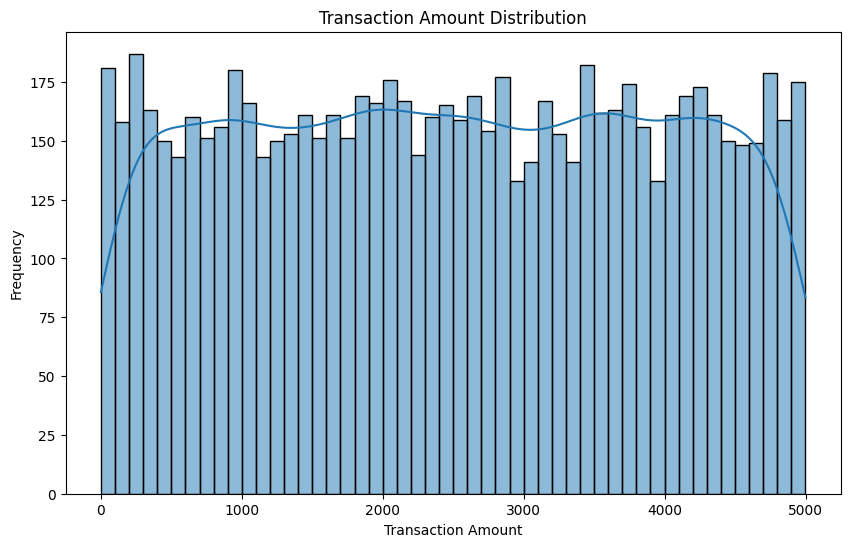

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Transaction Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

**Visualizing fraud flag variables using countplot**

<ipython-input-9-1d79bbce0283>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fraud Flag or Label', data=df, palette=["#2ca02c", "#ff7f0e"])  # Green and Orange colors


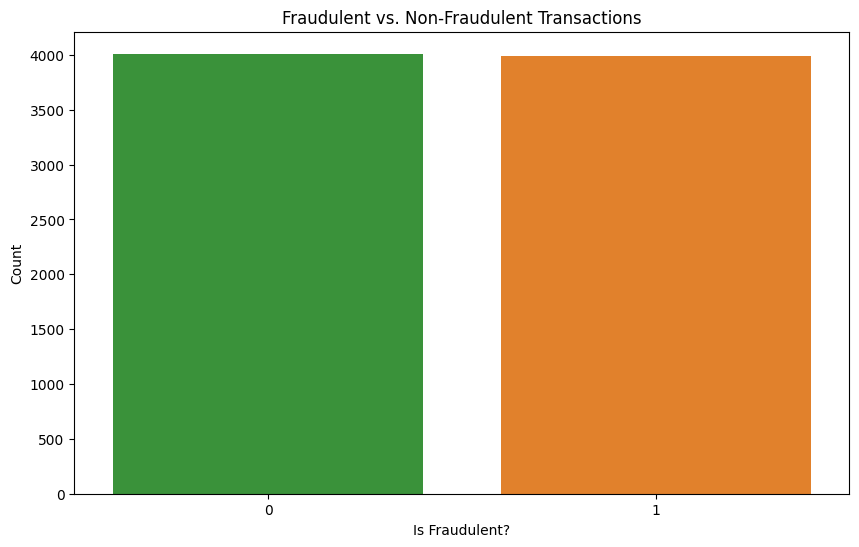

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Fraud Flag or Label', data=df, palette=["#2ca02c", "#ff7f0e"])
plt.title('Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Is Fraudulent?')
plt.ylabel('Count')
plt.show()

**Pie chart for Currency Distribution**

In [ ]:
import plotly.express as px
colors = px.colors.qualitative.Set3


fig = px.pie(df,
             names="Transaction Currency",
             title="Currency Distribution",
             color_discrete_sequence=colors)

fig.show()

**Here is the bar chart for Transaction Source Distribution**

In [ ]:
import plotly.express as px

transaction_source_fig = px.bar(df['Transaction Source'].value_counts(),
                                x=df['Transaction Source'].value_counts().index,
                                y=df['Transaction Source'].value_counts().values,
                                title="Transaction Source Distribution",
                                labels={'x':'Transaction Source', 'y':'Count'})

transaction_source_fig.show()

In [ ]:
# Drop unnecessary columns
columns_to_drop = [
    'Card Number (Hashed or Encrypted)',
    'CVV Code (Hashed or Encrypted)',
    'Transaction ID',
    'Transaction Notes',
    'Previous Transactions',
    'User Account Information'
]
df.drop(columns=columns_to_drop, inplace=True)


In [ ]:
# Check for missing values
print(df.isnull().sum())
df.dropna(inplace=True)

categorical_cols = ['Card Type', 'Transaction Source', 'Device Information']
df = pd.get_dummies(df, columns=categorical_cols)


Transaction Date and Time                  0
Transaction Amount                         0
Cardholder Name                            0
Merchant Name                              0
Merchant Category Code (MCC)               0
Transaction Location (City or ZIP Code)    0
Transaction Currency                       0
Card Type                                  0
Card Expiration Date                       0
Transaction Response Code                  0
Fraud Flag or Label                        0
Transaction Source                         0
IP Address                                 0
Device Information                         0
dtype: int64


In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Transaction Amount'] = scaler.fit_transform(df[['Transaction Amount']])

df.head()

,Transaction Date and Time,Transaction Amount,Cardholder Name,Merchant Name,Merchant Category Code (MCC),Transaction Location (City or ZIP Code),Transaction Currency,Card Expiration Date,Transaction Response Code,Fraud Flag or Label,IP Address,Card Type_American Express,Card Type_MasterCard,Card Type_Visa,Transaction Source_In-Person,Transaction Source_Online,Device Information_Desktop,Device Information_Mobile,Device Information_Tablet
0,2022-09-24 13:54:27,-1.523278,Shray Soman,"Rajagopalan, Ghose and Kant",3590,Khammam,INR,04/29,5,1,18.106.240.6,0,1,0,0,1,0,0,1
1,2020-07-24 11:20:13,-0.495501,Lakshit Bakshi,Sule PLC,7277,Vasai-Virar,EUR,03/26,12,1,212.48.185.128,1,0,0,0,1,0,1,0
2,2023-03-18 01:05:36,0.994159,Riya Bobal,Badal PLC,9297,Nangloi Jat,USD,11/29,5,1,17.190.112.46,0,0,1,1,0,0,1,0
3,2021-01-07 21:53:04,-1.460872,Mohanlal Balakrishnan,Konda-Sodhi,5686,Ramagundam,USD,09/25,5,0,153.136.24.104,0,0,1,1,0,0,0,1
4,2021-12-16 06:22:24,-0.557514,Mannat Rout,Dua Ltd,2940,Adoni,INR,03/31,5,1,196.153.28.131,0,1,0,0,1,1,0,0


In [ ]:

df['Transaction Date and Time'] = pd.to_datetime(df['Transaction Date and Time'])
df['Day_of_Week'] = df['Transaction Date and Time'].dt.dayofweek
df['Hour_of_Day'] = df['Transaction Date and Time'].dt.hour

# Drop the original 'Transaction Date and Time' column
df.drop('Transaction Date and Time', axis=1, inplace=True)


In [ ]:
df

,Transaction Amount,Cardholder Name,Merchant Name,Merchant Category Code (MCC),Transaction Location (City or ZIP Code),Transaction Currency,Card Expiration Date,Transaction Response Code,Fraud Flag or Label,IP Address,Card Type_American Express,Card Type_MasterCard,Card Type_Visa,Transaction Source_In-Person,Transaction Source_Online,Device Information_Desktop,Device Information_Mobile,Device Information_Tablet,Day_of_Week,Hour_of_Day
0,-1.523278,Shray Soman,"Rajagopalan, Ghose and Kant",3590,Khammam,INR,04/29,5,1,18.106.240.6,0,1,0,0,1,0,0,1,5,13
1,-0.495501,Lakshit Bakshi,Sule PLC,7277,Vasai-Virar,EUR,03/26,12,1,212.48.185.128,1,0,0,0,1,0,1,0,4,11
2,0.994159,Riya Bobal,Badal PLC,9297,Nangloi Jat,USD,11/29,5,1,17.190.112.46,0,0,1,1,0,0,1,0,5,1
3,-1.460872,Mohanlal Balakrishnan,Konda-Sodhi,5686,Ramagundam,USD,09/25,5,0,153.136.24.104,0,0,1,1,0,0,0,1,3,21
4,-0.557514,Mannat Rout,Dua Ltd,2940,Adoni,INR,03/31,5,1,196.153.28.131,0,1,0,0,1,1,0,0,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-0.194473,Lakshay Khatri,Manda Ltd,1236,Anantapuram,EUR,04/26,5,0,214.34.176.247,0,0,1,0,1,0,1,0,3,20
7996,-1.254460,Dharmajan Salvi,Bhavsar Group,3406,Guntakal,INR,11/25,0,1,34.237.199.33,0,0,1,1,0,0,0,1,0,5
7997,-1.087480,Alia Sane,"Gole, Yohannan and Singhal",7504,Udupi,USD,05/24,5,1,220.203.140.160,0,1,0,1,0,0,0,1,6,19
7998,0.371403,Chirag Rege,Kakar LLC,4015,Sultan Pur Majra,EUR,09/24,0,1,216.56.133.227,1,0,0,1,0,0,0,1,6,18


**Splitting the dataset**

In [ ]:

X = df.drop('Fraud Flag or Label', axis=1)
y = df['Fraud Flag or Label']

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
import numpy as np
# Checking for non-numeric columns
non_numeric_columns = X_train.select_dtypes(exclude=[np.number]).columns
if len(non_numeric_columns) > 0:
    print("Non-numeric columns found:", non_numeric_columns)
if X_train.isnull().any().any():
    print("Missing values found in X_train")



Non-numeric columns found: Index(['Cardholder Name', 'Merchant Name',
       'Transaction Location (City or ZIP Code)', 'Transaction Currency',
       'Card Expiration Date', 'IP Address'],
      dtype='object')


**Using PyTorch**

In [ ]:
# Converting to numeric dtype
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Converting to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values).float()
y_train_tensor = torch.tensor(y_train.values).long()
X_test_tensor = torch.tensor(X_test.values).float()
y_test_tensor = torch.tensor(y_test.values).long()

X_train_tensor.shape, y_train_tensor.shape, X_test_tensor.shape, y_test_tensor.shape

(torch.Size([6400, 19]),
 torch.Size([6400]),
 torch.Size([1600, 19]),
 torch.Size([1600]))

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network architecture
class FraudDetectionNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FraudDetectionNetwork, self).__init__()
        self.hidden1 = nn.Linear(input_size, hidden_size)
        self.hidden2 = nn.Linear(hidden_size, hidden_size)
        self.output = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.hidden1(x))
        x = self.relu(self.hidden2(x))
        x = self.output(x)
        return x

In [ ]:
# Set the random seed for reproducibility
torch.manual_seed(42)
input_size = 19
hidden_size = 64
output_size = 1
model = FraudDetectionNetwork(input_size, hidden_size, output_size)

loss_function = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    y_pred = model(X_train_tensor)
    loss = loss_function(y_pred.squeeze(), y_train_tensor.float())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 2.5031
Epoch [20/100], Loss: 4.1442
Epoch [30/100], Loss: 1.7130
Epoch [40/100], Loss: 4.3129
Epoch [50/100], Loss: 1.5602
Epoch [60/100], Loss: 4.2741
Epoch [70/100], Loss: 1.1965
Epoch [80/100], Loss: 4.1518
Epoch [90/100], Loss: 1.3109
Epoch [100/100], Loss: 3.9447


In [ ]:
torch.save(model.state_dict(), 'model.pth')


In [ ]:
model.eval()
with torch.no_grad():
    y_test_pred = model(X_test_tensor)
    y_test_pred_sigmoid = torch.sigmoid(y_test_pred.squeeze())
    predictions = y_test_pred_sigmoid.round().numpy()


In [ ]:
y_test_numpy = y_test_tensor.numpy()
report = classification_report(y_test_numpy, predictions)
print('Classification Report:\n', report)



Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.66       793
           1       0.00      0.00      0.00       807

    accuracy                           0.50      1600
   macro avg       0.25      0.50      0.33      1600
weighted avg       0.25      0.50      0.33      1600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

